# Titanic-Kaggle-Uygulaması 

Bu uygulamada titanic  kaggle daki veri seti  kullanarak model oluşturacağız


In [206]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [207]:
datatrain=pd.read_csv("train.csv")
datatest=pd.read_csv("test.csv")

# data processing 

In [208]:
datatrain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [209]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [210]:
columns_dict = {
    'PassengerId': 'Yolcu kimlik numarası. Her yolcu için benzersiz bir kimlik numarasıdır.',
    'Survived': 'Hayatta kalma durumu. 1, hayatta kalanları; 0, hayatını kaybedenleri temsil eder.',
    'Pclass': 'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.',
    'Name': 'Yolcunun adı.',
    'Sex': 'Cinsiyet. "male" erkekleri, "female" kadınları temsil eder.',
    'Age': 'Yolcunun yaşı. Bazı verilerde eksik değerler bulunabilir (non-null count: 714).',
    'SibSp': 'Yolcunun gemideki kardeş/eş sayısı.',
    'Parch': 'Yolcunun gemideki ebeveyn/çocuk sayısı.',
    'Ticket': 'Bilet numarası.',
    'Fare': 'Bilet ücreti.',
    'Cabin': 'Kabin numarası. Bazı verilerde eksik değerler bulunabilir (non-null count: 204).',
    'Embarked': 'Geminin hangi limandan kalktığı. "C" Cherbourg, "Q" Queenstown, "S" Southampton olarak kodlanmıştır. Bazı verilerde eksik değerler bulunabilir (non-null count: 889).'
}

In [211]:
columns_dict["Cabin"]

'Kabin numarası. Bazı verilerde eksik değerler bulunabilir (non-null count: 204).'

In [212]:
df=pd.concat([datatrain,datatest])

In [213]:
df.shape

(1309, 12)

In [214]:
datatrain.shape

(891, 12)

In [215]:
datatest.shape

(418, 11)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [217]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [218]:
numeric_columns= df.select_dtypes(include=["number"])

In [219]:
numeric_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
413,1305,NaN,3,NaN,0,0,8.0500
414,1306,NaN,1,39.0,0,0,108.9000
415,1307,NaN,3,38.5,0,0,7.2500
416,1308,NaN,3,NaN,0,0,8.0500


In [220]:
numeric_columns.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [221]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [222]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


<Axes: >

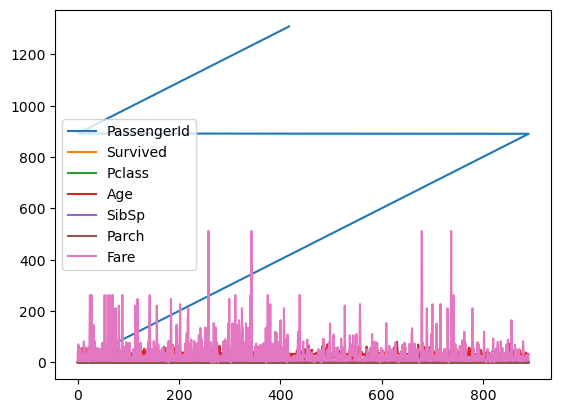

In [223]:
df.plot()

<Axes: >

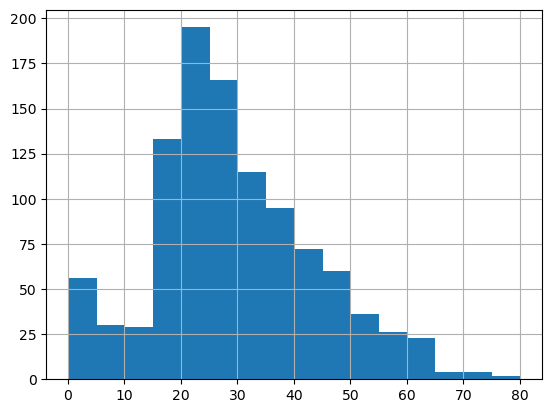

In [224]:
df["Age"].hist(bins=16)

<Axes: >

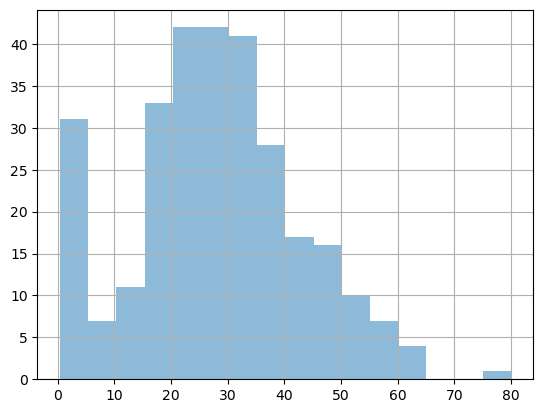

In [225]:
df[df["Survived"]==1]["Age"].hist(bins=16,alpha=0.5)

In [226]:
df["Survived"].groupby(df["Sex"]).value_counts(normalize=True)#oran valuecounts(normalize)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

In [227]:
df["Survived"].groupby(df["Sex"])

In [228]:
df["Survived"].groupby(df["Sex"]).value_counts()# burda sayları vermiş 

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

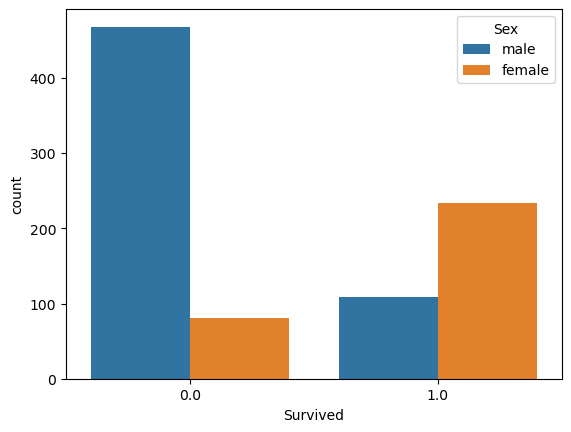

In [229]:
sns.countplot(x="Survived",hue="Sex",data=df)#ölen ve yaşayan ların kadın erkek olark garfik 

In [230]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [231]:
columns_dict["Pclass"]

'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.'

<Axes: xlabel='Survived', ylabel='count'>

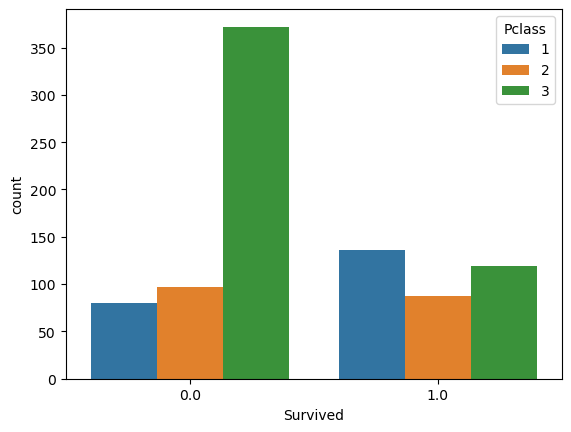

In [232]:
sns.countplot(x="Survived",hue="Pclass",data=df)#ölen ve yaşayan ların kadın erkek olark garfik 

In [233]:
df["Survived"].groupby(df["Pclass"]).value_counts(normalize=True)#oran valuecounts(normalize)

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [234]:
df_2 = df[(df["Survived"] == 1) & (df["Pclass"] == 1) & (df["Sex"] == "female")]


In [235]:
df_3 = df[(df["Survived"] == 1) & (df["Pclass"] == 1) & (df["Sex"] == "male")]

In [236]:
df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1.0,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1.0,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
862,863,1.0,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [237]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 887
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Survived     91 non-null     float64
 2   Pclass       91 non-null     int64  
 3   Name         91 non-null     object 
 4   Sex          91 non-null     object 
 5   Age          82 non-null     float64
 6   SibSp        91 non-null     int64  
 7   Parch        91 non-null     int64  
 8   Ticket       91 non-null     object 
 9   Fare         91 non-null     float64
 10  Cabin        78 non-null     object 
 11  Embarked     89 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.2+ KB


In [238]:
df_2["Sex"]

1      female
3      female
11     female
31     female
52     female
        ...  
856    female
862    female
871    female
879    female
887    female
Name: Sex, Length: 91, dtype: object

In [239]:
df_3["Sex"]

23     male
55     male
97     male
187    male
209    male
224    male
248    male
298    male
305    male
370    male
390    male
430    male
445    male
447    male
449    male
453    male
460    male
484    male
507    male
512    male
550    male
572    male
587    male
599    male
604    male
607    male
621    male
630    male
632    male
645    male
647    male
660    male
679    male
681    male
690    male
701    male
707    male
712    male
724    male
737    male
740    male
802    male
839    male
857    male
889    male
Name: Sex, dtype: object

In [240]:
df[ (df["Pclass"] == 1) & (df["Sex"] == "female")].value_counts(normalize=True)


PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket    Fare      Cabin            Embarked
2            1.0       1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0  1      0      PC 17599  71.2833   C85              C           0.013514
701          1.0       1       Astor, Mrs. John Jacob (Madeleine Talmadge Force)    female  18.0  1      0      PC 17757  227.5250  C62 C64          C           0.013514
642          1.0       1       Sagesser, Mlle. Emma                                 female  24.0  0      0      PC 17477  69.3000   B35              C           0.013514
628          1.0       1       Longley, Miss. Gretchen Fiske                        female  21.0  0      0      13502     77.9583   D9               S           0.013514
610          1.0       1       Shutes, Miss. Elizabeth W                            female  40.0  0      0      PC 17582  153.4625  C125             S           0

<Axes: xlabel='Age', ylabel='Count'>

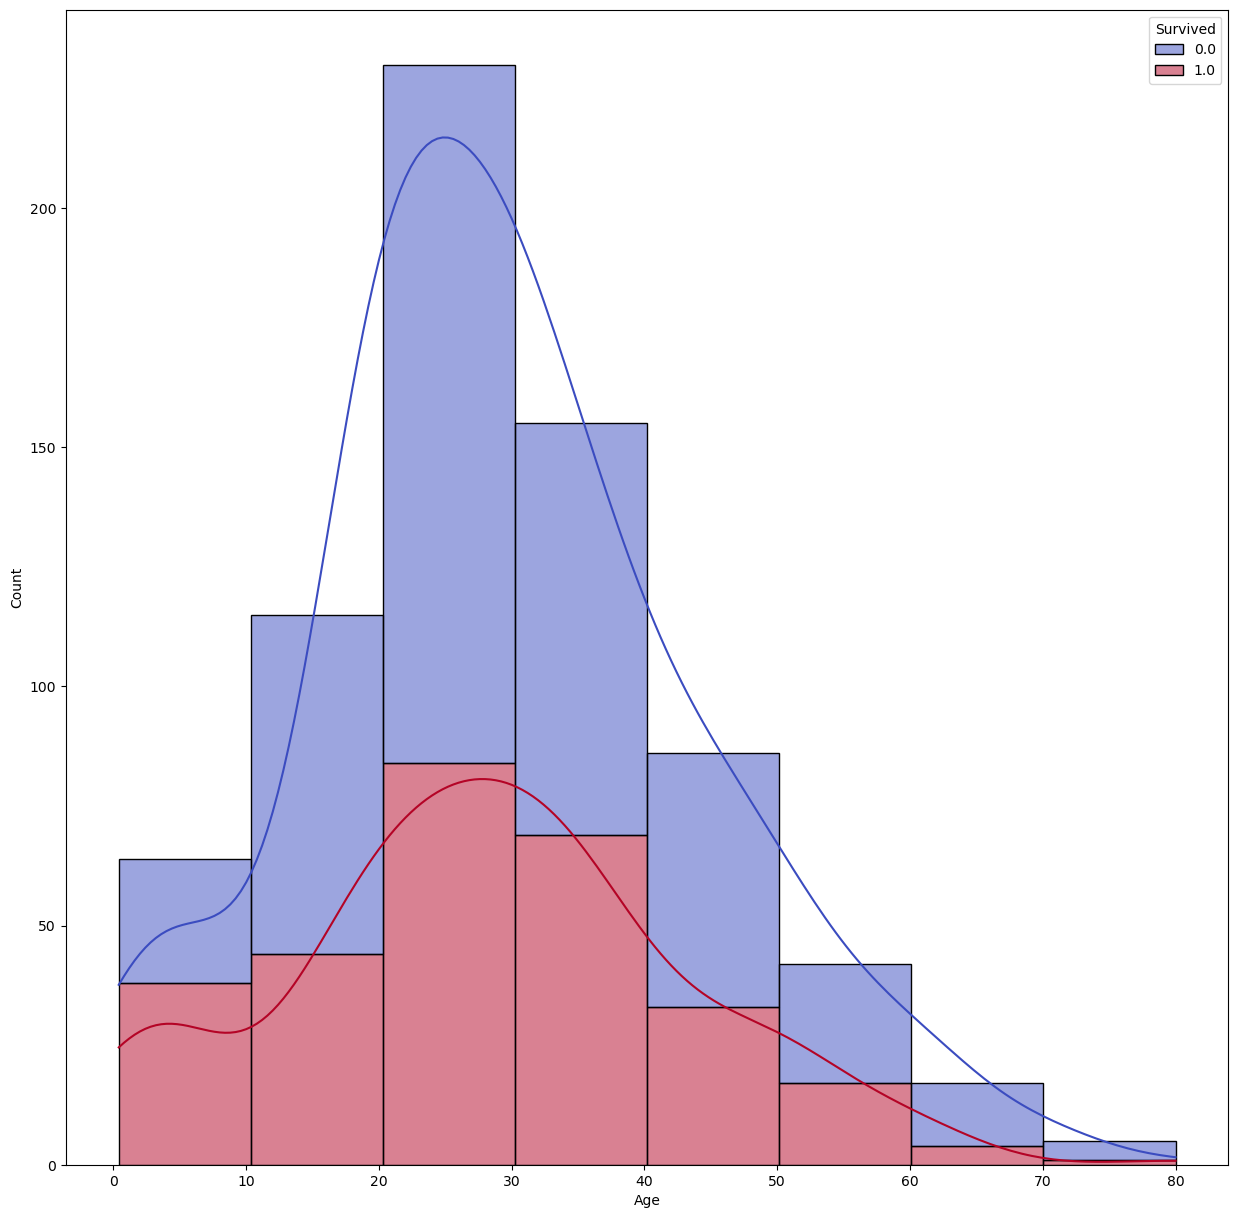

In [241]:
plt.figure(figsize=(15,15))
df_4=df.reset_index(drop=True)
sns.histplot(data=df_4,x="Age",hue="Survived",alpha=0.5,kde="True",multiple="stack",palette="coolwarm",bins=8)

In [242]:
df[df["Age"]<=75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [243]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

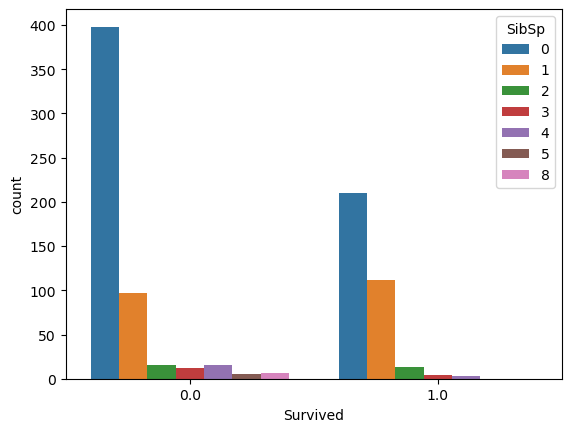

In [244]:
sns.countplot(x="Survived", hue="SibSp", data=df)


In [245]:
df["Survived"].groupby(df["SibSp"]).value_counts(normalize=True)

SibSp  Survived
0      0.0         0.654605
       1.0         0.345395
1      1.0         0.535885
       0.0         0.464115
2      0.0         0.535714
       1.0         0.464286
3      0.0         0.750000
       1.0         0.250000
4      0.0         0.833333
       1.0         0.166667
5      0.0         1.000000
8      0.0         1.000000
Name: proportion, dtype: float64

In [246]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [247]:
df["Survived"].groupby(df["Parch"]).value_counts(normalize=True)

Parch  Survived
0      0.0         0.656342
       1.0         0.343658
1      1.0         0.550847
       0.0         0.449153
2      0.0         0.500000
       1.0         0.500000
3      1.0         0.600000
       0.0         0.400000
4      0.0         1.000000
5      0.0         0.800000
       1.0         0.200000
6      0.0         1.000000
Name: proportion, dtype: float64

In [248]:
df["Survived"].groupby(df["Parch"]).value_counts(normalize=True)

Parch  Survived
0      0.0         0.656342
       1.0         0.343658
1      1.0         0.550847
       0.0         0.449153
2      0.0         0.500000
       1.0         0.500000
3      1.0         0.600000
       0.0         0.400000
4      0.0         1.000000
5      0.0         0.800000
       1.0         0.200000
6      0.0         1.000000
Name: proportion, dtype: float64

In [249]:
df["Survived"].groupby(df["Parch"]).value_counts()

Parch  Survived
0      0.0         445
       1.0         233
1      1.0          65
       0.0          53
2      0.0          40
       1.0          40
3      1.0           3
       0.0           2
4      0.0           4
5      0.0           4
       1.0           1
6      0.0           1
Name: count, dtype: int64

In [250]:
 normalized_counts = df.groupby(["Parch", "Pclass"])["Survived"].value_counts(normalize=True)


In [251]:
normalized_counts

Parch  Pclass  Survived
0      1       1.0         0.607362
               0.0         0.392638
       2       0.0         0.641791
               1.0         0.358209
       3       0.0         0.774278
               1.0         0.225722
1      1       1.0         0.677419
               0.0         0.322581
       2       1.0         0.750000
               0.0         0.250000
       3       0.0         0.636364
               1.0         0.363636
2      1       1.0         0.761905
               0.0         0.238095
       2       1.0         0.812500
               0.0         0.187500
       3       0.0         0.744186
               1.0         0.255814
3      2       1.0         1.000000
       3       0.0         0.666667
               1.0         0.333333
4      1       0.0         1.000000
       3       0.0         1.000000
5      3       0.0         0.800000
               1.0         0.200000
6      3       0.0         1.000000
Name: proportion, dtype: float64

In [252]:
 df.groupby(["Embarked"])["Survived"].value_counts(normalize=True)

Embarked  Survived
C         1.0         0.553571
          0.0         0.446429
Q         0.0         0.610390
          1.0         0.389610
S         0.0         0.663043
          1.0         0.336957
Name: proportion, dtype: float64

In [253]:
df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [254]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [255]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [256]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [257]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [258]:
df[df["Name"].str.contains("Capt",case=False)]#contains 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,Mr


In [259]:
df["Title"].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [260]:
df["Age"].groupby(df["Title"]).mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [261]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

<Axes: >

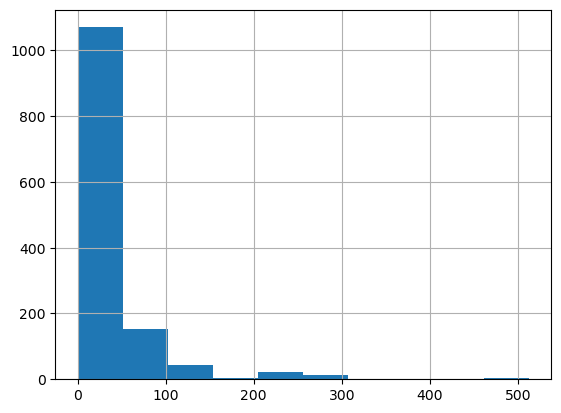

In [262]:
df["Fare"].hist()

In [263]:
df[df.Fare>512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [264]:
df.Fare.median()

14.4542

In [265]:
df.Fare.mode()

0    8.05
Name: Fare, dtype: float64

In [266]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)
#fill na burda fare boşluk olan yere mode değerini atar

In [267]:
df.Fare.isnull().sum()

0

In [272]:
df.Embarked.isnull().sum()

0

In [273]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

In [270]:
df['Embarked'].fillna("S",inplace=True)

In [ ]:
#df['Fare'].fillna(df['Fare'].median(),inplace=True)

In [276]:
y=df["Survived"]
X=df.drop(["Survived","PassengerId","Name","Ticket","Cabin"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [280]:
X=pd.get_dummies(X,drop_first =True)
#dummies pd.get_dummies() fonksiyonu, kategorik sütunları ikili (dummy) değişkenlere dönüştürür. Bu işlem, kategorik değişkenlerin ikili (0 veya 1) kodlamasına dönüştürülmesini sağlar. drop_first=True parametresi, dönüşüm sırasında ilk kategoriyi bırakarak kategorik değişkenlerin sonunu düşürür, bu da çoklu bağlantı (multicollinearity) sorununu ö
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False


In [282]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
dtype: int64

In [283]:
X_train=X[:891]
X_test= X[891:]
y_train=y[:891]
y_test=y[891:]

In [284]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True


In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [286]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [287]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[132  30]
 [ 25  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       162
         1.0       0.73      0.76      0.75       106

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[134  32]
 [ 23  79]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       166
         1.0       0.71      0.77      0.74       102

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  RandomForestClassifier()
Model Accuracy:  0.8097014925373134
Model Confusion Matrix:  [[137  31]
 [ 20  80]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       168
         1.0       0.72      0.80      0.76       100

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268

--------------------------------------------------
Model:  GradientBoostingClassifier()
Model Accuracy:  0.8246268656716418
Model Confusion Matrix:  [[144  34]
 [ 13  77]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       178
         1.0       0.69      0.86      0.77        90

    accuracy                           0.82       268
   macro avg       0.81      0.83      0.81       268
weighted avg       0.84      0.82      0.83     

(GradientBoostingClassifier(),
 0.8246268656716418,
 array([[130,  50],
        [ 27,  61]], dtype=int64))

In [288]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_predict=gb.predict(X_test)
y_predict

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [292]:
submission=pd.DataFrame({'PassengerId':datatest['PassengerId'],
                        'Survived':y_predict.astype(int)})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [294]:
submission.to_csv("submission.csv",index=False)